In [11]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import scipy.integrate as sc
#plt.rcParams.update({   "text.usetex": True,})

#kvec = [1e-7,1e-3,1e-2,1e-1, 1, 10]
u = 1
kvec = list(np.float_power(10,range(-10,2)))
print(kvec)
cosmo = Class()
cosmo.set({'H0':70, 'Omega_b':0.05, 'Omega_cdm':0.25, 'k_output_values':str(kvec).strip('[]'), 
           'output':'tCl, lCl, dTk, vTk, pCl', 'lensing':'yes',})
cosmo.compute()

bg = cosmo.get_background()
print(bg.keys())
a = 1/(1 + bg['z'])
tau = bg['conf. time [Mpc]']
#plt.loglog(a, tau)
a_eq = cosmo.get_current_derived_parameters(['a_eq'])['a_eq']
#plt.axvline(a_eq)
#print(np.interp(a_eq, a, tau))

#plt.figure()
#plt.loglog(a, bg['gr.fac. D'])
print("Great success")

[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_lambda', '(.)rho_ur', '(.)rho_crit', '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f'])
Great success


In [12]:
print(len(pts))

13


Text(0.5, 0, 'a')

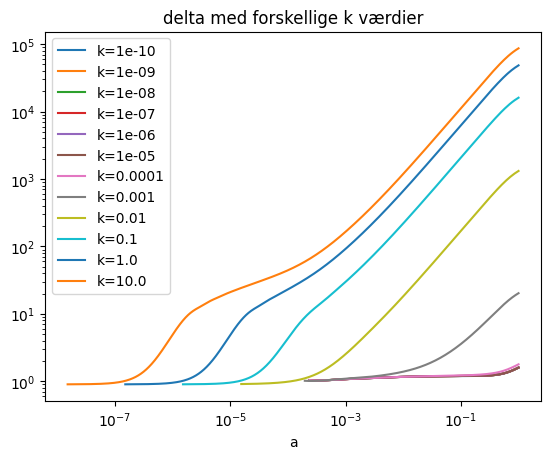

In [13]:

pts = cosmo.get_perturbations()['scalar']
#index_k = 1
#pts0 = pts[index_k]
#print(pts0['a'])
#print(pts0.keys())
#for species in ["cdm"]:# ['ur', 'cdm', 'b', 'g']:
delta_list = np.zeros(len(pts))
for k in range(len(pts)):
    species = "cdm"
    pts0 = pts[k]
    delta = pts0['delta_' + species]
    delta_list[k] = delta[-1]
    plt.loglog(pts0['a'], -delta, label="k=%s"%kvec[k])
plt.legend()
plt.title("delta med forskellige k værdier")#f'k = {kvec[index_k]} 1/Mpc')
plt.xlabel("a")

[2.55077064e+00 2.55077919e+00 2.55076093e+00 2.55075861e+00
 2.55083818e+00 2.55685323e+00 3.19350906e+00 4.10746916e+02
 1.73599206e+06 2.58343982e+08 2.34939150e+09 7.52905322e+09]


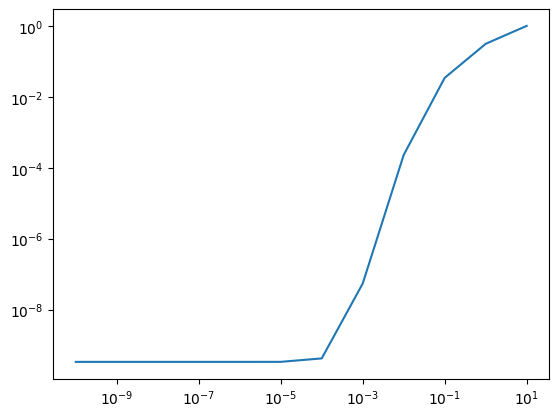

In [16]:
print(delta_list**2)

plt.loglog(kvec,(delta_list/delta_list[-1])**2)